**Cleaning data**

We show two data sets.

In the first one, to estimate the economy activity we'll be using the **State Quarterly Indicator of Economic Activity (ITAEE by its Spanish acronym)** *Indicador Trimestral de la Actividad Económica Estatal* produced by INEGI. We develop the generalized diffusion index for the Mexican economy using state economic coincident indexes. 

In the second one, we'll be using a database that shows a list of the **measures that the Government of Mexico City** and Mayor's Offices have implemented to address the health contingency of COVID-19.

**Exploring ITAEE data**

In [94]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.gridspec as gridspec
# File to Load (Remember to Change These)
file_to_load = "Resources/conjunto_de_datos_itaee_itaee_0202020_t4.csv"

# Read Purchasing File and store into Pandas data frame
itaee_data = pd.read_csv(file_to_load)
itaee_data.head()


,Descriptores,2003|T1,2003|T2,2003|T3,2003|T4,2003|Anual,2004|T1,2004|T2,2004|T3,2004|T4,...,2019|T1,2019|T2,2019|T3,2019|T4,2019|Anual,2020|T1<R>,2020|T2<R>,2020|T3<R>,2020|T4<P>,2020|Anual
0,Índice de volumen físico base 2013=100|Total,77.503956,83.416880,76.811752,81.440841,79.793357,79.984200,86.779487,80.300091,86.178942,...,112.923740,115.252267,116.813835,124.816904,117.451687,111.270259,96.733689,103.686066,114.045403,106.433854
1,Índice de volumen físico base 2013=100|Activid...,108.140544,129.946779,136.743335,131.581676,126.603083,92.034139,145.707737,107.641831,110.949912,...,66.215335,118.774439,113.766654,114.620901,103.344332,68.024463,121.476781,120.277480,106.849620,104.157086
2,Índice de volumen físico base 2013=100|Activid...,95.729909,97.763263,101.331206,101.862423,99.171700,96.155207,99.010923,107.112578,107.918355,...,99.814865,97.246303,102.025838,107.609435,101.674110,98.542354,70.652840,84.817679,98.313456,88.081583
3,Índice de volumen físico base 2013=100|Activid...,111.214383,119.095754,112.281942,132.428817,118.755224,108.393536,117.238413,123.168200,120.259932,...,103.405632,106.515984,109.689338,128.401767,112.003180,111.892557,90.493663,110.004400,153.099161,116.372445
4,Índice de volumen físico base 2013=100|Activid...,51.356571,53.176370,52.987197,54.621116,53.035314,57.755654,57.532249,57.619424,58.920519,...,107.018435,106.859964,106.964871,105.611481,106.613688,100.980324,92.667713,92.684218,97.840866,96.043280


In [2]:
# Inspect all columns
itaee_data.columns

Index(['Descriptores', '2003|T1', '2003|T2', '2003|T3', '2003|T4',
       '2003|Anual', '2004|T1', '2004|T2', '2004|T3', '2004|T4', '2004|Anual',
       '2005|T1', '2005|T2', '2005|T3', '2005|T4', '2005|Anual', '2006|T1',
       '2006|T2', '2006|T3', '2006|T4', '2006|Anual', '2007|T1', '2007|T2',
       '2007|T3', '2007|T4', '2007|Anual', '2008|T1', '2008|T2', '2008|T3',
       '2008|T4', '2008|Anual', '2009|T1', '2009|T2', '2009|T3', '2009|T4',
       '2009|Anual', '2010|T1', '2010|T2', '2010|T3', '2010|T4', '2010|Anual',
       '2011|T1', '2011|T2', '2011|T3', '2011|T4', '2011|Anual', '2012|T1',
       '2012|T2', '2012|T3', '2012|T4', '2012|Anual', '2013|T1', '2013|T2',
       '2013|T3', '2013|T4', '2013|Anual', '2014|T1', '2014|T2', '2014|T3',
       '2014|T4', '2014|Anual', '2015|T1', '2015|T2', '2015|T3', '2015|T4',
       '2015|Anual', '2016|T1', '2016|T2', '2016|T3', '2016|T4', '2016|Anual',
       '2017|T1', '2017|T2', '2017|T3', '2017|T4', '2017|Anual', '2018|T1',
       '2018

In [4]:
itaee_data.dtypes

Descriptores     object
2003|T1         float64
2003|T2         float64
2003|T3         float64
2003|T4         float64
                 ...   
2020|T1<R>      float64
2020|T2<R>      float64
2020|T3<R>      float64
2020|T4<P>      float64
2020|Anual      float64
Length: 91, dtype: object

In [5]:
# Extract only columns 
reduced_itaee = itaee_data.loc[:, ['Descriptores','2018|T1','2018|T2', '2018|T3', '2018|T4', '2018|Anual', 
                                   '2019|T1', '2019|T2', '2019|T3', '2019|T4', '2019|Anual',
                                   '2020|T1<R>', '2020|T2<R>', '2020|T3<R>', '2020|T4<P>', '2020|Anual']]
reduced_itaee.head()

,Descriptores,2018|T1,2018|T2,2018|T3,2018|T4,2018|Anual,2019|T1,2019|T2,2019|T3,2019|T4,2019|Anual,2020|T1<R>,2020|T2<R>,2020|T3<R>,2020|T4<P>,2020|Anual
0,Índice de volumen físico base 2013=100|Total,110.250927,117.324349,116.516508,123.961167,117.013238,112.923740,115.252267,116.813835,124.816904,117.451687,111.270259,96.733689,103.686066,114.045403,106.433854
1,Índice de volumen físico base 2013=100|Activid...,60.962400,115.786488,110.580173,113.251287,100.145087,66.215335,118.774439,113.766654,114.620901,103.344332,68.024463,121.476781,120.277480,106.849620,104.157086
2,Índice de volumen físico base 2013=100|Activid...,103.673852,105.636262,102.085147,104.836266,104.057882,99.814865,97.246303,102.025838,107.609435,101.674110,98.542354,70.652840,84.817679,98.313456,88.081583
3,Índice de volumen físico base 2013=100|Activid...,120.240812,120.981544,112.864082,119.615397,118.425459,103.405632,106.515984,109.689338,128.401767,112.003180,111.892557,90.493663,110.004400,153.099161,116.372445
4,Índice de volumen físico base 2013=100|Activid...,107.535656,110.930970,111.526827,109.019763,109.753304,107.018435,106.859964,106.964871,105.611481,106.613688,100.980324,92.667713,92.684218,97.840866,96.043280


**First category "Índice de volumen físico base 2013=100"**

In [6]:
#Extract only rows that cointains'Índice de volumen físico base 2013=100'
index_volume = reduced_itaee.loc[reduced_itaee['Descriptores'].str.contains('Índice de volumen físico base 2013=100')]

In [7]:
#Extract only row that cointains the principal economic activities
index_vol_act = index_volume.loc[(index_volume['Descriptores'] == 'Índice de volumen físico base 2013=100|Actividades primarias')|
                                (index_volume['Descriptores'] == 'Índice de volumen físico base 2013=100|Actividades secundarias')|
                                (index_volume['Descriptores'] == 'Índice de volumen físico base 2013=100|Actividades terciarias')]              

**Trimestral index "Índice de volumen físico base 2013=100"**

In [8]:
#Extract only trimestral columns
trim_index_vol_act = index_vol_act.loc[:, ['Descriptores','2018|T1','2018|T2', '2018|T3', '2018|T4', 
                                   '2019|T1', '2019|T2', '2019|T3', '2019|T4',
                                   '2020|T1<R>', '2020|T2<R>', '2020|T3<R>', '2020|T4<P>']]

**Anual index "Índice de volumen físico base 2013=100"**

In [9]:
#Extract only annual columns
annual_index_vol_act = index_vol_act.loc[:, ['Descriptores','2018|Anual','2019|Anual','2020|Anual']]

**Second category "Variación porcentual"**
Crecimiento económico. El crecimiento económico se calcula a partir de la siguiente fórmula:
𝐶𝑟𝑒𝑐𝑖𝑚𝑖𝑒𝑛𝑡𝑜 𝐸𝑐𝑜𝑛ó𝑚𝑖𝑐𝑜𝑡𝑝 = ( 𝐼𝑇𝐴𝐸𝐸𝑡𝑝/𝐼𝑇𝐴𝐸𝐸𝑡(𝑝−1))− 1) donde t es cada uno de los trimestres del año, e ITAEE es el Indicador Trimestral de la Actividad Económica Estatal.

In [10]:
#Extract only rows that cointains'Variación porcentual'
variation_percentage = reduced_itaee.loc[reduced_itaee['Descriptores'].str.contains('Variación porcentual')]

variation_percentage.rename({'2018|Anual':'2018','2019|Anual':'2019','2020|Anual':'2020',
                                     '2020|T1<R>': '2020|T1', '2020|T2<R>': '2020|T2','2020|T3<R>':'2020|T3', 
                                    '2020|T4<P>':'2020|T4'},  axis='columns', inplace = True)                                                                                                                                                                                                                       

variation_percentage

C:\Users\ssses\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Descriptores,2018|T1,2018|T2,2018|T3,2018|T4,2018,2019|T1,2019|T2,2019|T3,2019|T4,2019,2020|T1,2020|T2,2020|T3,2020|T4,2020
10,Variación porcentual anual|Total,-0.436616,3.334011,4.854748,3.007330,2.702365,2.424299,-1.766114,0.255180,0.690327,0.374700,-1.464246,-16.067864,-11.238197,-8.629842,-9.380736
11,Variación porcentual anual|Actividades primarias,-15.149552,2.494940,5.358284,22.247379,4.750912,8.616680,2.580570,2.881603,1.209359,3.194610,2.732188,2.275188,5.722965,-6.779986,0.786452
12,Variación porcentual anual|Actividades secunda...,-1.246970,3.425199,-1.514418,-0.319337,0.068205,-3.722237,-7.942310,-0.058098,2.645239,-2.290813,-1.274871,-27.346503,-16.866472,-8.638628,-13.368721
13,Variación porcentual anual|Actividades secunda...,-11.089007,-4.357805,-2.919239,-0.050512,-4.815112,-14.001219,-11.956832,-2.812891,7.345517,-5.423056,8.207411,-15.042175,0.287231,19.234466,3.901019
14,Variación porcentual anual|Actividades secunda...,4.820544,4.432412,5.163735,3.288321,4.424368,-0.480977,-3.669855,-4.090456,-3.126297,-2.860612,-5.642122,-13.281167,-13.350787,-7.357737,-9.914681
15,Variación porcentual anual|Actividades secunda...,-2.009347,0.622175,-6.756888,-2.661366,-2.701003,-7.713753,-11.431054,-1.299773,4.253871,-4.102601,-1.105641,-37.409957,-22.437805,-6.872318,-16.262139
16,Variación porcentual anual|Actividades secunda...,-1.140821,5.412106,1.764738,1.148996,1.789877,-0.895677,-5.846224,1.126625,1.963653,-0.936790,-1.020499,-21.912476,-13.518825,-10.076607,-11.657999
17,Variación porcentual anual|Actividades terciarias,-0.338849,3.324551,5.572524,3.348855,2.991345,3.121610,-1.098796,0.286893,0.492369,0.658464,-1.485571,-14.939264,-10.656503,-8.629773,-8.971307
18,Variación porcentual anual|Actividades terciar...,1.530788,3.317958,7.378402,3.994656,4.094004,2.970678,-3.504197,-2.413605,0.004171,-0.825454,-7.393862,-34.209260,-15.346213,-7.478951,-15.851542
19,Variación porcentual anual|Actividades terciar...,-0.720951,3.326046,5.167803,3.189398,2.742302,3.153156,-0.553401,0.904831,0.613852,0.998025,-0.252877,-10.699680,-9.618677,-8.914407,-7.425342


**Total variation**

In [11]:
#Extract only row that cointains the total percentual variation 
var_tot = variation_percentage.loc[(variation_percentage['Descriptores'] == 'Variación porcentual anual|Total')]              
var_tot.head()

,Descriptores,2018|T1,2018|T2,2018|T3,2018|T4,2018,2019|T1,2019|T2,2019|T3,2019|T4,2019,2020|T1,2020|T2,2020|T3,2020|T4,2020
10,Variación porcentual anual|Total,-0.436616,3.334011,4.854748,3.00733,2.702365,2.424299,-1.766114,0.25518,0.690327,0.3747,-1.464246,-16.067864,-11.238197,-8.629842,-9.380736


In [32]:
#Extract only quarter columns
trim_var_total = var_tot.loc[:, ['Descriptores','2018|T1','2018|T2', '2018|T3', '2018|T4', 
                                   '2019|T1', '2019|T2', '2019|T3', '2019|T4',
                                 '2020|T1', '2020|T2', '2020|T3', '2020|T4']]

trim_var_total.set_index('Descriptores')
trim_var_total = trim_var_total.set_index('Descriptores')
quarter_var_total = trim_var_total.T
quarter_var_total.rename(columns={'Variación porcentual anual|Total':'Total Percentual Variation'},inplace=True)    
quarter_var_total

Descriptores,Total Percentual Variation
2018|T1,-0.436616
2018|T2,3.334011
2018|T3,4.854748
2018|T4,3.007330
2019|T1,2.424299
2019|T2,-1.766114
2019|T3,0.255180
2019|T4,0.690327
2020|T1,-1.464246
2020|T2,-16.067864


In [142]:
#Extract only annual columns
annual_var_total = var_tot.loc[:, ['Descriptores','2018','2019','2020']]
annual_var_total.set_index('Descriptores')
annual_var_total = annual_var_total.set_index('Descriptores')
annual_var_total = annual_var_total.T
annual_var_total.rename(columns={'Variación porcentual anual|Total':'Total Percentual Variation'},inplace=True)
annual_var_total

Descriptores,Total Percentual Variation
2018,2.702365
2019,0.374700
2020,-9.380736


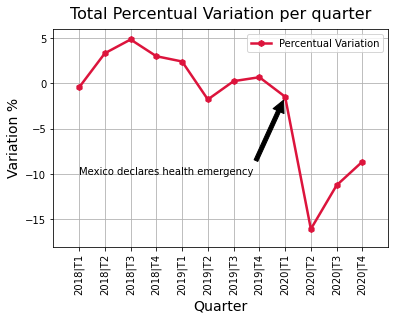

In [176]:
# ploting
tq_f= quarter_var_total.reset_index()
tq_t = tq_f['index']
tq_v = tq_f['Total Percentual Variation']
percentual_variation, = plt.plot(tq_t, tq_v,marker='h',color="crimson",linewidth= 2.5, linestyle= "-", label="Percentual Variation")
tick_locations = [value for value in tq_t]
plt.xticks(tick_locations, tq_t, rotation="vertical")
plt.legend(loc="best")
plt.title("Total Percentual Variation per quarter", fontsize=16, y=1.02)
plt.xlabel("Quarter", fontsize=14)
plt.ylabel("Variation %", fontsize=14)
plt.xlim(-1,12)
plt.ylim(-18,6)
plt.annotate(f'Mexico declares health emergency',fontsize=10,color="black",xy=(8, -1.464246),xytext=(0,-10),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.grid()
plt.show()

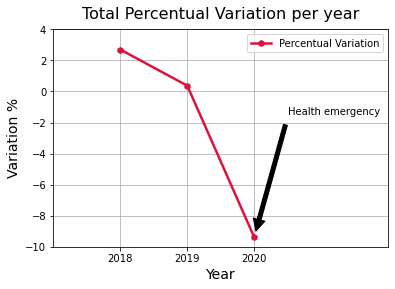

In [182]:
# ploting
tq_fn = annual_var_total.reset_index()
tq_fn
tq_tn = tq_fn['index']
tq_vn = tq_fn['Total Percentual Variation']
percentual_variation_n, = plt.plot(tq_tn, tq_vn, marker='h',color="crimson",linewidth= 2.5, linestyle= "-", label="Percentual Variation")
plt.legend(loc="best")
plt.title("Total Percentual Variation per year", fontsize=16, y=1.02)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Variation %", fontsize=14)
plt.xlim(-1,4)
plt.ylim(-10,4)
plt.annotate(f'Health emergency',fontsize=10,color="black",xy=(2, -9.380736),xytext=(2.5,-1.5),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.grid()
plt.show()


**Economic activities**

In [183]:
#Extract only row that cointains the principal economic activities
var_act = variation_percentage.loc[(variation_percentage['Descriptores'] == 'Variación porcentual anual|Actividades primarias')|
                                (variation_percentage['Descriptores'] == 'Variación porcentual anual|Actividades secundarias')|
                                (variation_percentage['Descriptores'] == 'Variación porcentual anual|Actividades terciarias')]              

**"Variación porcentual" per quarter**

In [184]:
#Extract only trimestral columns
trim_var_act = var_act.loc[:, ['Descriptores','2018|T1','2018|T2', '2018|T3', '2018|T4', 
                                   '2019|T1', '2019|T2', '2019|T3', '2019|T4',
                                   '2020|T1', '2020|T2', '2020|T3', '2020|T4']]

trim_var_act.set_index('Descriptores')
trim_var_act = trim_var_act.set_index('Descriptores')
quarter_var_act = trim_var_act.T
quarter_var_act.rename(columns={'Variación porcentual anual|Actividades primarias':'Primary sector',
                               'Variación porcentual anual|Actividades secundarias':'Secondary sector',
                               'Variación porcentual anual|Actividades terciarias':'Tertiary sector'},inplace=True)
quarter_var_act

Descriptores,Primary sector,Secondary sector,Tertiary sector
2018|T1,-15.149552,-1.246970,-0.338849
2018|T2,2.494940,3.425199,3.324551
2018|T3,5.358284,-1.514418,5.572524
2018|T4,22.247379,-0.319337,3.348855
2019|T1,8.616680,-3.722237,3.121610
2019|T2,2.580570,-7.942310,-1.098796
2019|T3,2.881603,-0.058098,0.286893
2019|T4,1.209359,2.645239,0.492369
2020|T1,2.732188,-1.274871,-1.485571
2020|T2,2.275188,-27.346503,-14.939264


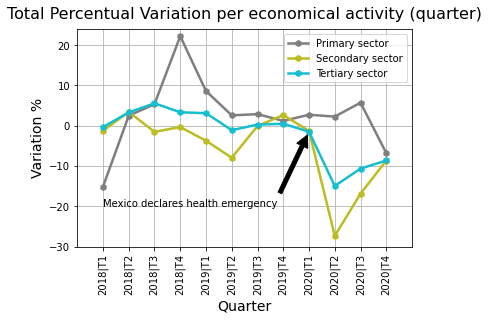

In [197]:
# ploting
act_df= quarter_var_act.reset_index()
x = act_df['index']
y1 = act_df['Primary sector']
y2 = act_df['Secondary sector']
y3 = act_df['Tertiary sector']

primary_sector, = plt.plot(x,y1,marker='h',color="tab:gray",linewidth= 2.5, linestyle= "-", label="Primary sector")
secondary_sector, = plt.plot(x,y2,marker='h',color="tab:olive",linewidth= 2.5, linestyle= "-", label="Secondary sector")
tertiary_sector, = plt.plot(x,y3,marker='h',color="tab:cyan",linewidth= 2.5, linestyle= "-", label="Tertiary sector")

tick_locations = [value for value in x]
plt.xticks(tick_locations, aq_t, rotation="vertical")
plt.legend(loc="best")
plt.title("Total Percentual Variation per economical activity (quarter)", fontsize=16, y=1.02)
plt.xlabel("Quarter", fontsize=14)
plt.ylabel("Variation %", fontsize=14)
plt.xlim(-1,12)
plt.ylim(-30,24)
plt.annotate(f'Mexico declares health emergency',fontsize=10,color="black",xy=(8, -1.464246),xytext=(0,-20),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.grid()
plt.show()


**"Variación porcentual" per year**

In [185]:
#Extract only anual columns
annual_var_act = var_act.loc[:, ['Descriptores','2018','2019','2020']]
annual_var_act.head()
annual_var_act.set_index('Descriptores')
annual_var_act = annual_var_act.set_index('Descriptores')
annual_var_act = annual_var_act.T
annual_var_act.rename(columns={'Variación porcentual anual|Actividades primarias':'Primary sector',
                               'Variación porcentual anual|Actividades secundarias':'Secondary sector',
                               'Variación porcentual anual|Actividades terciarias':'Tertiary sector'},inplace=True)
annual_var_act

Descriptores,Primary sector,Secondary sector,Tertiary sector
2018,4.750912,0.068205,2.991345
2019,3.194610,-2.290813,0.658464
2020,0.786452,-13.368721,-8.971307


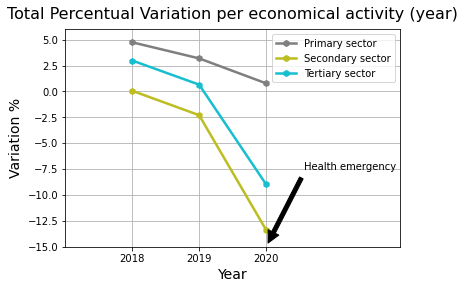

In [218]:
# ploting
act_dfn = annual_var_act.reset_index()
xn = act_dfn['index']
y1n = act_dfn['Primary sector']
y2n = act_dfn['Secondary sector']
y3n = act_dfn['Tertiary sector']

primary_sector, = plt.plot(xn,y1n,marker='h',color="tab:gray",linewidth= 2.5, linestyle= "-", label="Primary sector")
secondary_sector, = plt.plot(xn,y2n,marker='h',color="tab:olive",linewidth= 2.5, linestyle= "-", label="Secondary sector")
tertiary_sector, = plt.plot(xn,y3n,marker='h',color="tab:cyan",linewidth= 2.5, linestyle= "-", label="Tertiary sector")

plt.legend(loc="best")
plt.title("Total Percentual Variation per economical activity (year)", fontsize=16, y=1.02)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Variation %", fontsize=14)
plt.xlim(-1,4)
plt.ylim(-15,6)
plt.annotate(f'Health emergency',fontsize=10,color="black",xy=(2, -15),xytext=(2.57,-7.6),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.grid()
plt.show()

*As part of this introduction, to determine when to limit economic activity in the capital, the Mexican government set up a system that takes into account 10 measures of hospitalizations, infections and deaths.*

*The levels of risk were labeled according to the colors of Mexican traffic lights: green meant the numbers were low, orange denoted a higher risk and a few restrictions, and red signaled a widespread outbreak that called for a shutdown of all nonessential businesses.*

*The calculation assigns a certain number of points to each indicator, depending on its severity. When the sum of all points total more than 31, the state, or the capital city, gets a red light — and that prompts a lockdown.*